In [ ]:
# !cp /content/train.csv "/content/drive/MyDrive/Projects/Github/Work Hour Prediction"
# !cp /content/test.csv "/content/drive/MyDrive/Projects/Github/Work Hour Prediction"
# !cp /content/submission.csv "/content/drive/MyDrive/Projects/Github/Work Hour Prediction"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Mon Sep 20 12:46:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    62W / 149W |     70MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import RandomizedSearchCV

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Projects/Github/Work Hour Prediction/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Projects/Github/Work Hour Prediction/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/Projects/Github/Work Hour Prediction/submission.csv')

In [4]:
train.head()

age          workclass  fnlwgt  ... hours-per-week  native-country  income
0   52            Private   98926  ...             44   United-States   <=50K
1   76   Self-emp-not-inc  132607  ...             44   United-States    >50K
2   40            Private  243258  ...             57   United-States    >50K
3   76          State-gov  181259  ...             44   United-States    >50K
4   36       Self-emp-inc  115379  ...             58   United-States   <=50K

[5 rows x 15 columns]

In [5]:
train.shape

(18944, 15)

In [6]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             18944 non-null  int64 
 1   workclass       18944 non-null  object
 2   fnlwgt          18944 non-null  int64 
 3   education       18944 non-null  object
 4   education-num   18944 non-null  int64 
 5   marital-status  18944 non-null  object
 6   occupation      18944 non-null  object
 7   relationship    18944 non-null  object
 8   race            18944 non-null  object
 9   sex             18944 non-null  object
 10  capital-gain    18944 non-null  int64 
 11  capital-loss    18944 non-null  int64 
 12  hours-per-week  18944 non-null  int64 
 13  native-country  18944 non-null  object
 14  income          18944 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.2+ MB


In [8]:
train.describe()

age         fnlwgt  ...  capital-loss  hours-per-week
count  18944.000000   18944.000000  ...  18944.000000    18944.000000
mean      39.266470  164292.035156  ...     33.082823       40.119299
std       13.395878   93425.986084  ...    248.521486       11.124649
min       14.000000    8019.000000  ...     -2.000000        1.000000
25%       28.000000   98530.750000  ...      0.000000       35.000000
50%       40.000000  152895.500000  ...      0.000000       39.000000
75%       47.000000  215541.000000  ...      0.000000       44.000000
max       99.000000  772988.000000  ...   2437.000000      102.000000

[8 rows x 6 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5faf5df50>,
      dtype=object)

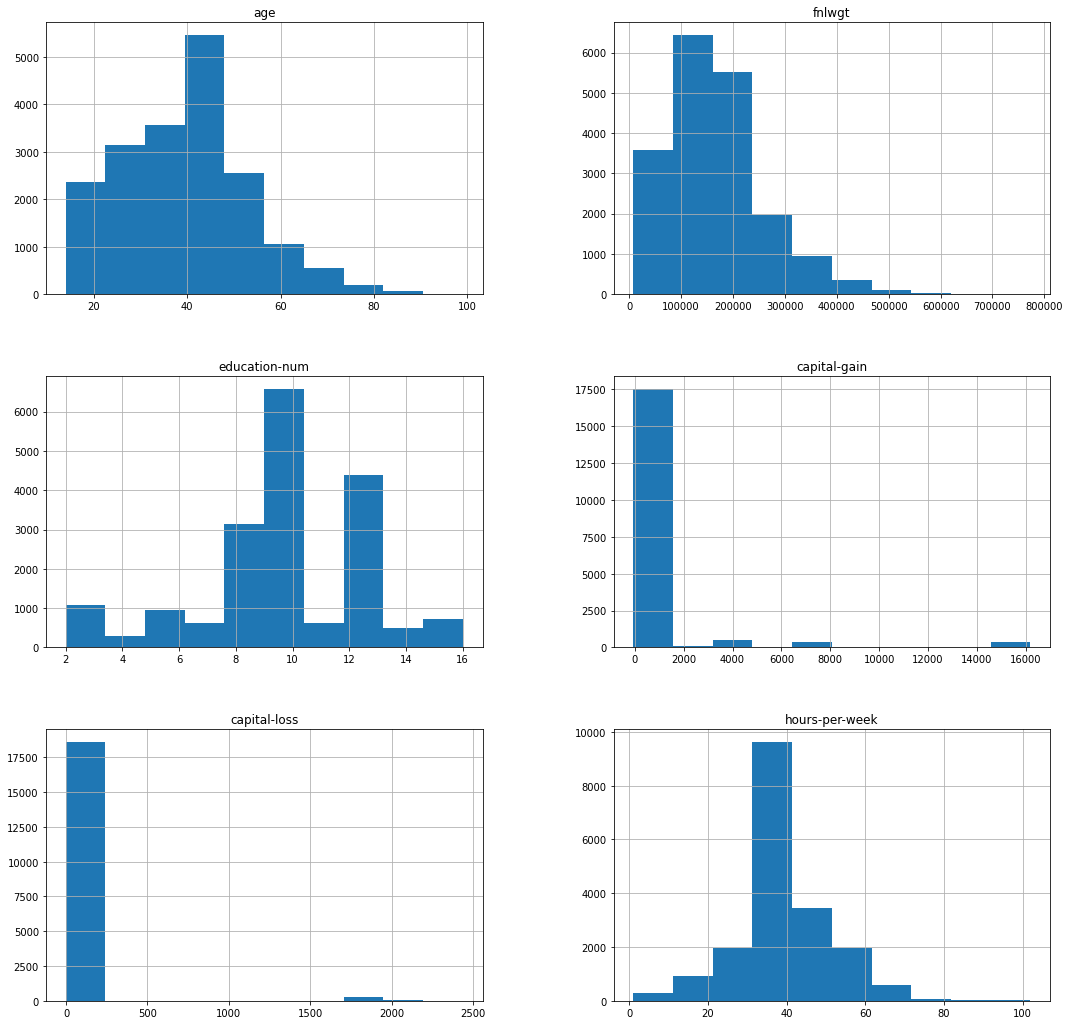

In [9]:
train.hist(figsize = (18,18))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


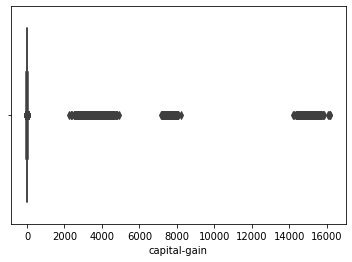

In [10]:
sns.boxplot(train['capital-gain'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


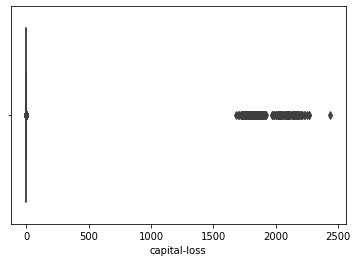

In [11]:
sns.boxplot(train['capital-loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


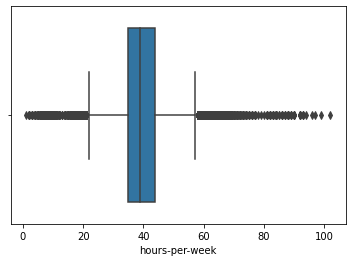

In [12]:
sns.boxplot(train['hours-per-week'])

In [13]:
train.head()

age          workclass  fnlwgt  ... hours-per-week  native-country  income
0   52            Private   98926  ...             44   United-States   <=50K
1   76   Self-emp-not-inc  132607  ...             44   United-States    >50K
2   40            Private  243258  ...             57   United-States    >50K
3   76          State-gov  181259  ...             44   United-States    >50K
4   36       Self-emp-inc  115379  ...             58   United-States   <=50K

[5 rows x 15 columns]

In [14]:
for i in list(train.columns):
  print(f"{i} :  {train[i].nunique()}")

age :  81
workclass :  8
fnlwgt :  18341
education :  16
education-num :  15
marital-status :  7
occupation :  14
relationship :  6
race :  5
sex :  2
capital-gain :  1256
capital-loss :  209
hours-per-week :  95
native-country :  41
income :  2


In [15]:
for i in list(test.columns):
  print(f"{i} :  {test[i].nunique()}")

age :  79
workclass :  8
fnlwgt :  8019
education :  16
education-num :  16
marital-status :  7
occupation :  14
relationship :  6
race :  5
sex :  2
capital-gain :  626
capital-loss :  120
native-country :  39
income :  2
hours-per-week :  0


In [16]:
for i in train.age.unique():
  if i in test.age.unique():
    pass
  else:
    print(i)

92
99


In [17]:
for i in list(db.columns):
  if i in list(db_test.columns):
    pass
  else:
    print(i)

NameError: ignored

In [19]:
extra_fe = pd.concat([train[train.age == 92],train[train.age == 99],train[train['native-country'] == ' Holand-Netherlands'],train[train['native-country'] == ' Outlying-US(Guam-USVI-etc)']], axis = 0)
# train.drop(extra_fe, axis = 0, inplace = True)

In [20]:
train.drop(extra_fe.index,inplace = True)
train.reset_index(drop = True, inplace = False)


age          workclass  fnlwgt  ... hours-per-week  native-country  income
0       52            Private   98926  ...             44   United-States   <=50K
1       76   Self-emp-not-inc  132607  ...             44   United-States    >50K
2       40            Private  243258  ...             57   United-States    >50K
3       76          State-gov  181259  ...             44   United-States    >50K
4       36       Self-emp-inc  115379  ...             58   United-States   <=50K
...    ...                ...     ...  ...            ...             ...     ...
18927   25            Private  174301  ...             39   United-States   <=50K
18928   22            Private  135915  ...             44          Canada   <=50K
18929   47          Local-gov   47276  ...             39   United-States   <=50K
18930   48            Private   88787  ...             71           South   <=50K
18931   47        Federal-gov  175720  ...             39   United-States    >50K

[18932 rows x 15 columns]

In [21]:
# Categorical Columns
# ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']
cat_data = train.drop(["age",'fnlwgt','education-num','capital-gain','capital-loss','hours-per-week'], axis = 1)
cat_to_num_data = pd.get_dummies(cat_data, drop_first = True)
db = train.copy()
db.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income'], axis = 1, inplace = True)
db = pd.concat([db, cat_to_num_data], axis = 1)
db.head()

age  fnlwgt  ...  native-country_ Yugoslavia  income_ >50K
0   52   98926  ...                           0             0
1   76  132607  ...                           0             1
2   40  243258  ...                           0             1
3   76  181259  ...                           0             1
4   36  115379  ...                           0             0

[5 rows x 96 columns]

In [23]:
X_ = db.drop(['hours-per-week'], axis = 1)
Y_ = db['hours-per-week']

In [24]:
standardizer = StandardScaler()
X = pd.DataFrame(standardizer.fit_transform(X_), columns = X.columns)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_, random_state = 42)

In [29]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               }

In [ ]:
rf = RandomForestRegressor()
model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
model.fit(X_train, Y_train)
mse(Y_test,model.predict(X_test)), mse(Y_train, model.predict(X_train))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
# MSE 

# RandomForestRegressor = (97.50989763363619, 14.210595887034298)
# GradientBoostingRegressor = (90.48997625264818, 90.48628095074679)
# XGBRegressor = (90.45885065049046, 90.7136356046105)
# ExtraTreesRegressor = (112.17916467356858, 0.0)


In [ ]:
# Categorical Columns
# ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']
test = test.drop(['hours-per-week'], axis = 1)
cat_data_test = test.drop(["age",'fnlwgt','education-num','capital-gain','capital-loss'], axis = 1)
cat_to_num_data_test = pd.get_dummies(cat_data_test, drop_first = True)
db_test = test.copy()
db_test.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income'], axis = 1, inplace = True)
db_test = pd.concat([db_test, cat_to_num_data_test], axis = 1)
db_test.head()

age  fnlwgt  ...  native-country_ Yugoslavia  income_ >50K
0   40  106899  ...                           0             0
1   38  157191  ...                           0             0
2   76  102547  ...                           0             0
3   38   44426  ...                           0             1
4   62   33230  ...                           0             0

[5 rows x 95 columns]

In [ ]:
db_test.isnull().sum().sum()

0

In [ ]:
db_test2 = pd.DataFrame(standardizer.transform(db_test), columns = db_test.columns)

In [ ]:
testPred = model.predict(db_test2)

In [ ]:
testPred = pd.DataFrame(testPred, columns = ['hours-per-week'])

In [ ]:
testPred.to_csv('testPred_GBM.csv')